In [2]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_1445051/3767750905.py:9: RuntimeWarning: invalid value encountered in divide
  cone_mask = np.arccos(np.abs(dxproj)/dxmag) <= ala


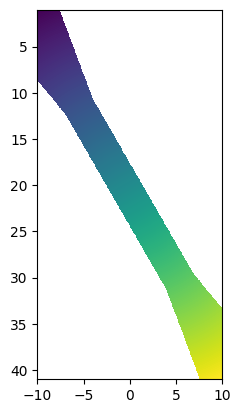

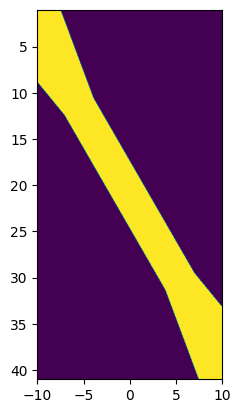

In [30]:
def calc_tautx_apodtx(xfoc, nvec, dof, pfoc, ala, c0, t0):
    """tabs"""
    dx = pfoc - xfoc[None,:]
    dxmag  = np.linalg.norm(dx, axis=1)
    dxproj = np.sum(dx * nvec[None,:], axis=1)

    tau = np.sign(dxproj) * dxmag/c0 + t0

    cone_mask = np.arccos(np.abs(dxproj)/dxmag) <= ala
    dof_mask  = np.sqrt(dxmag**2 - dxproj**2) < dof * np.sin(ala)/2
    dof_mask[cone_mask] = 0

    apod = cone_mask | dof_mask

    tau[dof_mask] = dxproj[dof_mask] * np.sqrt(1 + np.tan(ala)**2) / c + t0

    return tau, apod

xout = 1E-3*np.linspace(-10, 10, 401)
zout = 1E-3*np.linspace(1, 41, 801)

XOUT, ZOUT = np.meshgrid(xout, zout, indexing='ij')

pnts = np.array([XOUT.flatten(), ZOUT.flatten()]).T

fc   = 5E6
c    = 1540
lam  = c/fc
fnum = 3
ala  = np.arctan2(1/2, fnum)

xfoc = 1E-3*np.array([0, 21])
alpha = np.radians(30)
nvec = np.array([np.sin(alpha),  np.cos(alpha)])
dof  = 8 * fnum**2 * lam

taus, apods = calc_tautx_apodtx(xfoc, nvec, dof, pnts, ala, c, 20E-3/c)

taus  = taus .reshape(XOUT.shape)
apods = apods.reshape(XOUT.shape)

taus_mask = np.nan * np.zeros(taus.shape)
taus_mask[apods] = taus[apods]

extent = 1E3*np.array([xout[0], xout[-1], zout[-1], zout[0]])
plt.figure()
plt.imshow(taus_mask.T, extent=extent)
plt.show()

plt.figure()
plt.imshow(apods.T, extent=extent)
plt.show()